# Predicting Gender Based on Personal Preferences

In this project, we aim to determine if we can predict an individual's gender based on their personal preferences, including their favorite color, music genre, beverage, and soft drink.

## Dataset Overview

### Context

Do societal expectations lead to differences in preferences between males and females? This dataset explores whether these differences in personal preferences can be used to predict gender with an accuracy significantly higher than random chance.

### Data Description

You can find details here:
https://www.kaggle.com/datasets/hb20007/gender-classification

### Dataset Features

- **Favorite Color**: The color the individual prefers.
- **Favorite Music Genre**: The genre of music the individual enjoys most.
- **Favorite Beverage**: The beverage the individual likes best.
- **Favorite Soft Drink**: The soft drink the individual prefers.

### Important Note

The dataset is not a large one, and it is not clear whether the data is of high quality or not. Gender is a complex concept that involves various fields and more serious factors, such as psychological aspects or cases where a male exhibits female behaviors, and vice versa. Therefore, the results of this project may not be certain. The primary aim of this project is to learn, not to make definitive decisions.

### Inspiration

With the rise of gender equality, the influence of gender on personal preferences has decreased. For instance, colors traditionally associated with femininity or masculinity are now viewed as less relevant. Despite this trend, this project investigates whether a reliable gender classifier can still be built based on personal preferences. What can this dataset reveal about current gender preferences?



## Importing Libraries and Modules

In this section, we import essential libraries and modules required for data analysis, visualization, and machine learning:

### Overview

We import a variety of libraries to support different stages of our data science workflow:

- **Data Handling and Analysis**: `numpy` and `pandas` are used for numerical operations and data manipulation.
- **Visualization**: `matplotlib.pyplot` and `seaborn` provide tools for creating visualizations and advanced statistical graphics.
- **Preprocessing and Modeling**: Modules like `OneHotEncoder`, `train_test_split`, `make_column_transformer`, `make_pipeline`, and `DecisionTreeClassifier` help in preparing data for modeling and building machine learning models.
- **Evaluation**: `confusion_matrix` and `cross_val_score` are used for evaluating model performance and validating results.

These imports are crucial for effectively preprocessing data, constructing and evaluating machine learning models, and visualizing results.


In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from scipy import stats

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading and Previewing the Dataset

In this section, we load the dataset into a pandas DataFrame and preview its contents to understand its structure and the first few records.

In [2]:
df = pd.read_csv("/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv") 
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


## Preprocessing and Data Cleaning

### Exploring the DataFrame

Before diving into preprocessing, it’s important to examine the dataset to understand its structure and features.

### Dataset Overview

The dataset is relatively small and contains a limited number of columns and features. We begin by inspecting its index to get an initial sense of its size and structure:


In [3]:
df.index

RangeIndex(start=0, stop=66, step=1)

### Checking for Missing Values

To ensure that our dataset is complete and ready for analysis, we check for any missing values across all columns:

In [4]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

The output shows that there are no missing values in any of the columns (Favorite Color, Favorite Music Genre, Favorite Beverage, Favorite Soft Drink, and Gender).

### Dataset Information

To gain a comprehensive overview of our dataset, we use the `df.info()` method. This provides details about the DataFrame's structure, including the number of entries, columns, and data types:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


DataFrame Structure: The DataFrame contains 66 rows and 5 columns.
Columns and Data Types: All columns (Favorite Color, Favorite Music Genre, Favorite Beverage, Favorite Soft Drink, and Gender) are of type object, which typically indicates that they contain categorical or textual data.
Non-Null Count: Each column has 66 non-null entries, meaning there are no missing values in any column.
Memory Usage: The DataFrame occupies approximately 2.7 KB of memory.

### Unique Values in Each Column

To better understand the categorical features of our dataset, we inspect the unique values present in each column:

In [6]:
print("Unique values of Favorite color:",df["Favorite Color"].unique())
print("Unique values of Favorite Music Genre:",df["Favorite Music Genre"].unique())
print("Unique values of Favorite Beverage:",df["Favorite Beverage"].unique())
print("Unique values of Favorite Soft drink:",df["Favorite Soft Drink"].unique())
print("Unique values of Gender column:",df["Gender"].unique())

Unique values of Favorite color: ['Cool' 'Neutral' 'Warm']
Unique values of Favorite Music Genre: ['Rock' 'Hip hop' 'Folk/Traditional' 'Jazz/Blues' 'Pop' 'Electronic'
 'R&B and soul']
Unique values of Favorite Beverage: ['Vodka' 'Wine' 'Whiskey' "Doesn't drink" 'Beer' 'Other']
Unique values of Favorite Soft drink: ['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']
Unique values of Gender column: ['F' 'M']


### Do we females like warm color more than males?

To understand gender-based preferences for warm colors, we calculate the percentage of females and males who prefer warm colors from the dataset

In [7]:
numberOfFemales = df[(df["Gender"] == "F")].shape[0]
numberOfFemales_whoLike_warmColor = df[(df["Gender"] == "F") & (df["Favorite Color"]=="Warm")].shape[0]
print("According to the dataframe",((numberOfFemales_whoLike_warmColor / numberOfFemales) * 100) ,"percentage of females like warm color")

According to the dataframe 39.39393939393939 percentage of females like warm color


In [8]:
numberOfMales = df[(df["Gender"] == "M")].shape[0]
numberOfMales_whoLike_warmColor = df[(df["Gender"] == "M") & (df["Favorite Color"]=="Warm")].shape[0]
print("According to the dataframe",((numberOfMales_whoLike_warmColor / numberOfMales) * 100) ,"percentage of males like warm color")

According to the dataframe 27.27272727272727 percentage of males like warm color


### Summary of Most Frequent Values

To gain insights into the most common values in each column, we use the `df.describe()` method and focus on the `top` row, which provides the most frequently occurring values:

In [9]:
df.describe().loc["top"]

Favorite Color                     Cool
Favorite Music Genre               Rock
Favorite Beverage         Doesn't drink
Favorite Soft Drink     Coca Cola/Pepsi
Gender                                F
Name: top, dtype: object

### Preprocessing Categorical Data

To prepare the categorical features for modeling, we create a preprocessing pipeline that applies one-hot encoding to specific columns. This ensures that categorical variables are properly transformed into a format suitable for the machine learning algorithm we use later.


In [10]:
categorical_columns = ["Favorite Color","Favorite Music Genre","Favorite Beverage","Favorite Soft Drink"]
preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary",handle_unknown="ignore"), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False
)

### Splitting the Dataset

To prepare for model training and evaluation, we split the dataset into features and target variables, and then further divide it into training and testing sets.
With 66 rows, having 20% for testing allows us to have a sufficiently large test set to evaluate model performance while still maintaining a substantial amount of data for training. This balance is crucial for avoiding overfitting and ensuring that the model generalizes well.


In [11]:
Y = df["Gender"]
X = df.drop(columns=["Gender"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) 

### Building and Training the Model (Decision Tree Classifier)

In this step, we construct a machine learning pipeline that includes preprocessing and model training, and then fit the model to our training data.


In [12]:
model = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42)
)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['Favorite Color',
                                                   'Favorite Music Genre',
                                                   'Favorite Beverage',
                                                   'Favorite Soft Drink'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

### Evaluating and Visualizing the Decision Tree

After training the model, we evaluate its performance and visualize the decision tree to understand its structure.

Model score on train dataset: 0.9615384615384616
Model score on test dataset: 0.6428571428571429
Depth of tree is: 8


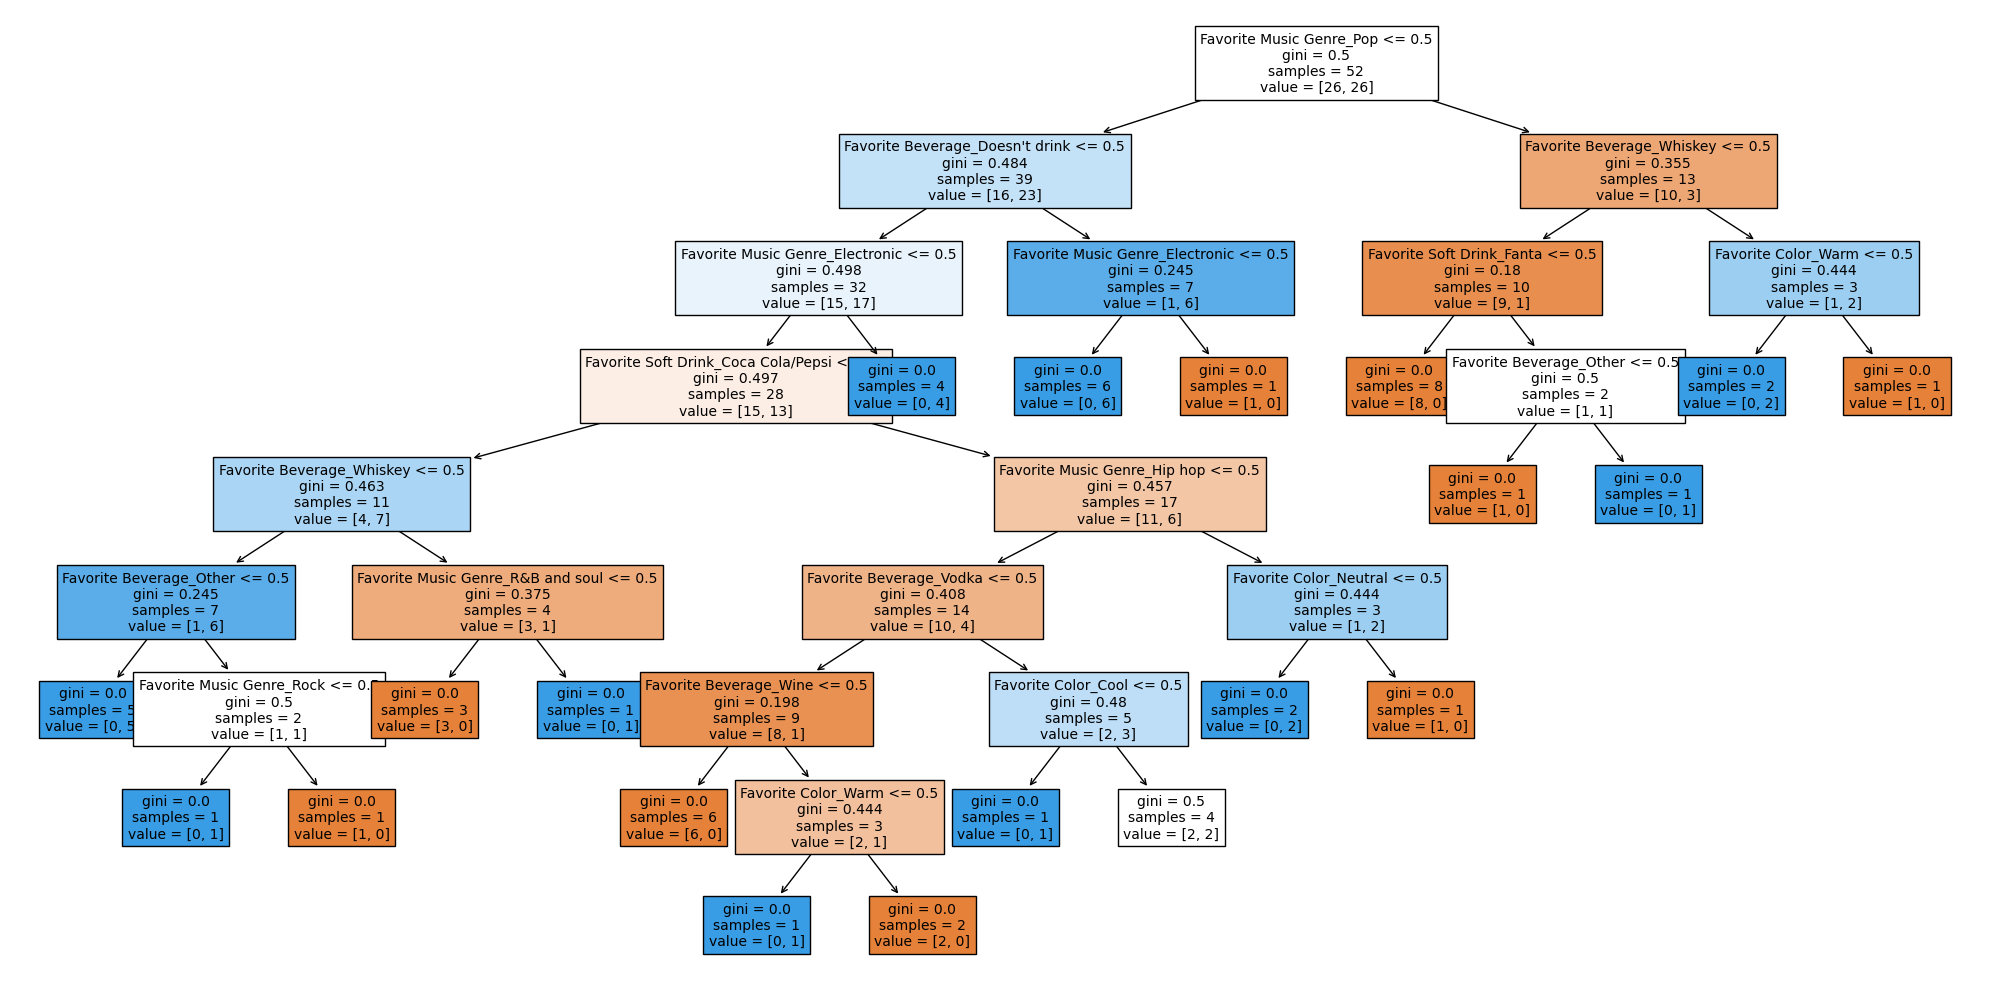

In [13]:
decision_tree = model.named_steps["decisiontreeclassifier"]
preprocessor = model.named_steps["columntransformer"]
feature_names  = preprocessor.get_feature_names_out()

print("Model score on train dataset:", model.score(X_train, y_train) )
print("Model score on test dataset:", model.score(X_test, y_test) )
print("Depth of tree is:" , decision_tree.get_depth())
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, feature_names=feature_names ,filled=True, fontsize=10)
plt.tight_layout()
plt.show()

### Results:
The model achieves an accuracy of approximately 96.15% on the training data, indicating a strong fit to the training set.
The accuracy drops to approximately 64.29% on the test data, suggesting that the model may be **overfitting** the training data and has lower generalization performance on unseen data.
The decision tree has a depth of 8, indicating the number of levels in the tree.

Overfitting occurs when the model learns not only the underlying patterns but also the noise in the training data, leading to poor generalization to new data

### Confusion Matrix Analysis

The confusion matrices provide a detailed view of how well the model classifies the data for both training and testing datasets. Here, we analyze the performance of the model based on these matrices.


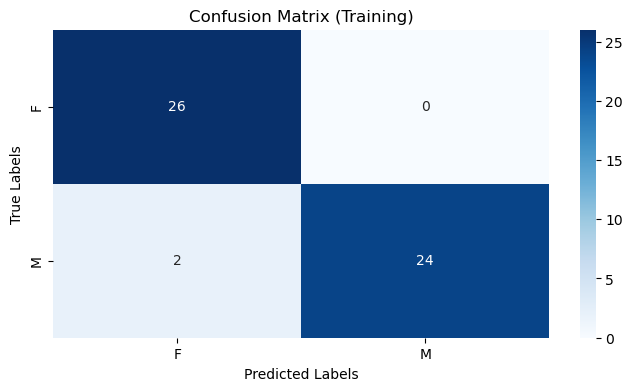

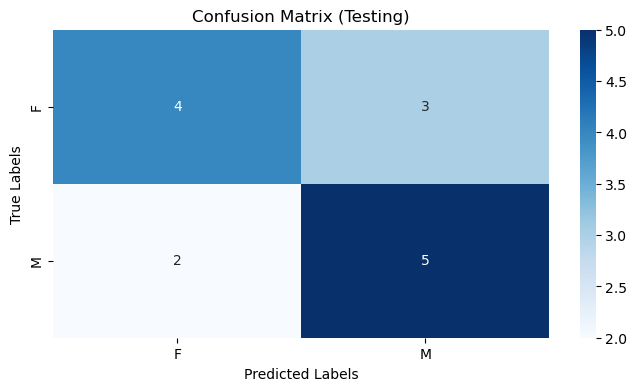

In [14]:
model_train_predicitions = model.predict(X_train)
model_test_predicitions = model.predict(X_test)
model_train_confusion_matrix = confusion_matrix(y_train, model_train_predicitions)
model_test_confusion_matrix = confusion_matrix(y_test, model_test_predicitions)
plt.figure(figsize=(8, 4))
sns.heatmap(
    model_train_confusion_matrix, annot=True, cmap='Blues',
    xticklabels = df["Gender"].unique(),
    yticklabels = df["Gender"].unique()
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Training)')
plt.show()

plt.figure(figsize=(8, 4))
sns.heatmap(
    model_test_confusion_matrix, annot=True, cmap='Blues',
    xticklabels = df["Gender"].unique(),
    yticklabels = df["Gender"].unique()
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Testing)')
plt.show()

#### Training Dataset

In the confusion matrix for the training dataset:
- **Females**: Out of 26 females, 26 were correctly classified, achieving 100% accuracy.
- **Males**: Out of 26 males, 24 were correctly classified and 2 were misclassified, resulting in approximately 92% accuracy.

#### Testing Dataset

In the confusion matrix for the testing dataset:
- **Females**: Out of 7 females, 4 were correctly classified, resulting in approximately 57% accuracy.
- **Males**: Out of 7 males, 5 were correctly classified, leading to approximately 71% accuracy.

This indicates that while the model performs well on the training data, its performance on the test data is lower.


### Analyzing Cost Complexity Pruning Path

To improve our decision tree model, we analyze the cost complexity pruning path. This helps us understand how the tree's complexity affects its performance and choose an optimal pruning strategy.
Cost_complexity_pruning_path method calculates the effective alpha (ccp_alpha) internal nodes, which measures the cost of removing the node from the tree in terms of increased impurity versus the reduction in the number of leaves.

In [15]:
X_train_transformed = preprocessor.transform(X_train)
path = decision_tree.cost_complexity_pruning_path(X_train_transformed, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Pruning and Evaluating Decision Trees

To optimize the decision tree's complexity, we perform pruning by varying the cost complexity parameter (`ccp_alpha`) and evaluate the model's performance. This helps in selecting the best model with an appropriate level of pruning.


In [16]:
warnings.filterwarnings('ignore')
pruned_models = []
alpha_train_loop_values = []
alpha_test_loop_values = []
for ccp_alpha in ccp_alphas:
    pruned_model = make_pipeline(
        preprocessor,
        DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    )
    pruned_model.fit(X_train, y_train)
    pruned_models.append(pruned_model)
    train_score = pruned_model.score(X_train, y_train)
    test_score = pruned_model.score(X_test, y_test)
    alpha_train_loop_values.append([ccp_alpha, train_score])
    alpha_test_loop_values.append([ccp_alpha, test_score])

alpha_train_results = pd.DataFrame(alpha_train_loop_values, columns=["ccp alpha","score"]) 
alpha_test_results = pd.DataFrame(alpha_test_loop_values, columns=["ccp alpha","score"])    

### Plotting Mean Scores with Error Bars

To visualize the performance of pruned decision tree models across different cost complexity pruning values, we plot the train and test scores. This helps in understanding how pruning affects model performance on both training and testing datasets.


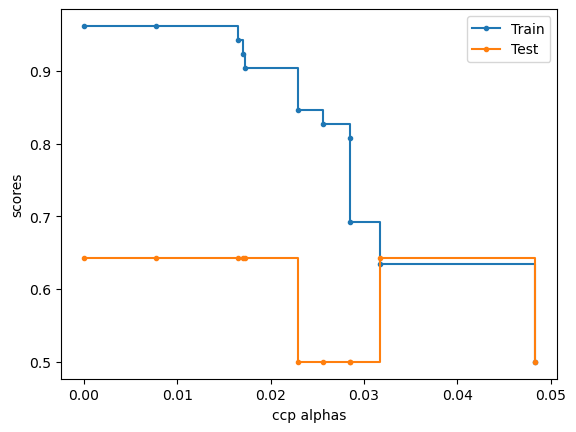

In [17]:
fig, ax = plt.subplots()
ax.errorbar(alpha_train_results["ccp alpha"], alpha_train_results["score"], label="Train",marker=".", drawstyle="steps-post")
ax.errorbar(alpha_test_results["ccp alpha"], alpha_test_results["score"], label="Test",marker="." , drawstyle="steps-post")
ax.set_xlabel("ccp alphas")
ax.set_ylabel("scores")
ax.legend()

### Observations from the Plot

The plot reveals the following insights about the model's performance across different cost complexity pruning (`ccp_alpha`) values:

- **Training Data**:
  - The mean cross-validation scores for the training dataset show variability depending on the `ccp_alpha` value. This indicates that as we adjust the pruning parameter, the model's performance on the training data changes.

- **Testing Data**:
  - We see the variability also here. As we can see the best value to maximize the test score is between 0.06 and 0.07




In [18]:
best_alpha = alpha_test_results[(alpha_test_results["score"]> 0.6) & (alpha_test_results["score"] < 0.7) & 
                  (alpha_test_results["ccp alpha"] > 0.03)]["ccp alpha"].values[0]
best_alpha

0.031687329764252835

## **0.03168733 is chosen as best ccp alpha value since it maximizes the test score and overfitting doesn't happen.**

In [19]:
best_pruned_model = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
)
best_pruned_model.fit(X_train, y_train)
print("train score using best alpha: ",best_pruned_model.score(X_train, y_train))
print("test score using best alpha: ",best_pruned_model.score(X_test, y_test))

train score using best alpha:  0.6346153846153846
test score using best alpha:  0.6428571428571429


### Let's visually see how this algorithm decreases the number of nodes and depth of the tree:

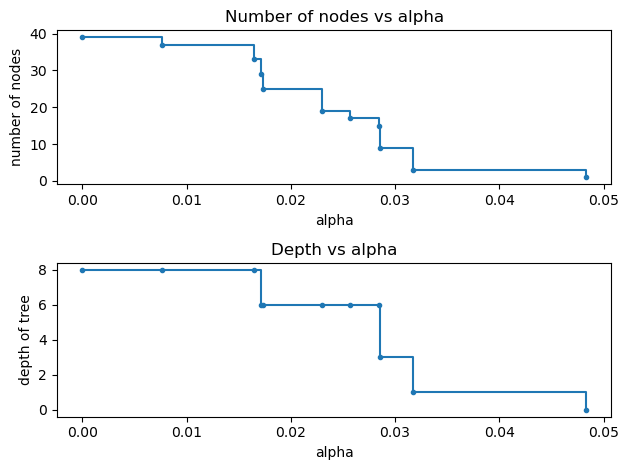

In [20]:
node_counts = [pruned_model.named_steps["decisiontreeclassifier"].tree_.node_count for pruned_model in pruned_models]
depth = [pruned_model.named_steps["decisiontreeclassifier"].tree_.max_depth for pruned_model in pruned_models]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker=".", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker=".", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Optimal Decision Tree Analysis

The decision tree identified as optimal for our model is noteworthy for its simplicity: it relies solely on the feature "pop as favorite music genre" to predict gender. This indicates that, among all features considered, "pop as favorite music genre" is the most significant predictor of gender in this dataset.

**Danger! It may be a sign of underfitting!**


Depth of tree is: 1


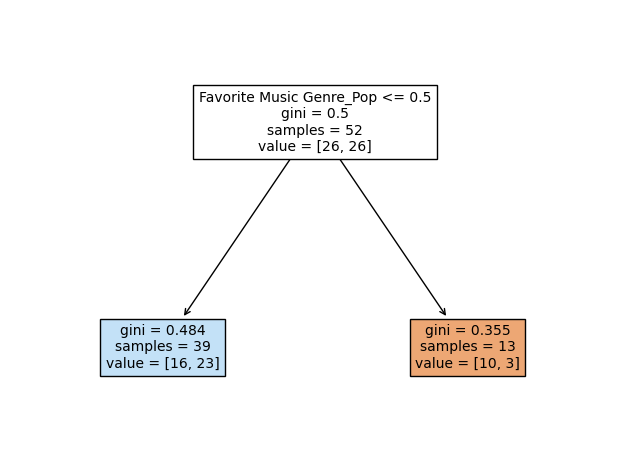

In [21]:
decision_tree = best_pruned_model.named_steps["decisiontreeclassifier"]
preprocessor = best_pruned_model.named_steps["columntransformer"]
feature_names  = preprocessor.get_feature_names_out()

print("Depth of tree is:" , decision_tree.get_depth())
tree.plot_tree(decision_tree, feature_names=feature_names ,filled=True, fontsize=10)
plt.tight_layout()
plt.show()

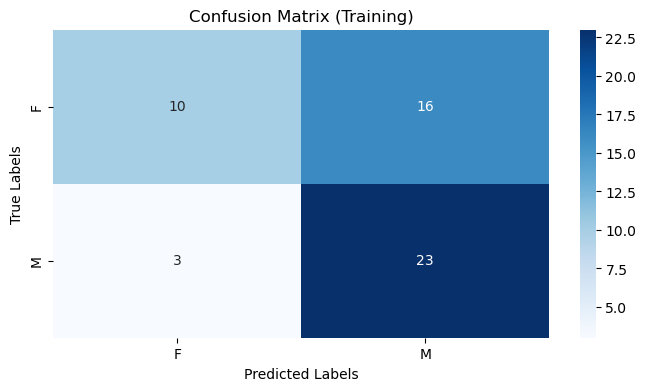

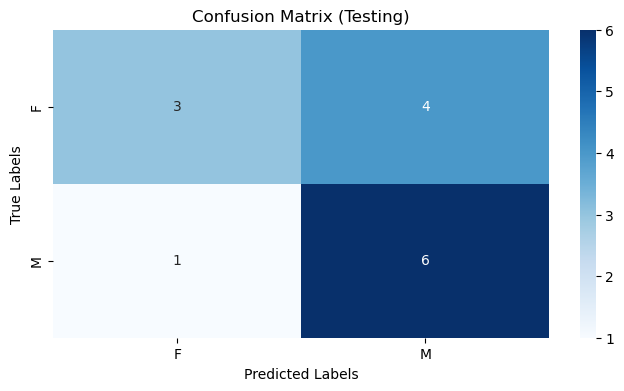

In [22]:
model_train_predicitions = best_pruned_model.predict(X_train)
model_test_predicitions = best_pruned_model.predict(X_test)
model_train_confusion_matrix = confusion_matrix(y_train, model_train_predicitions)
model_test_confusion_matrix = confusion_matrix(y_test, model_test_predicitions)
plt.figure(figsize=(8, 4))
sns.heatmap(
    model_train_confusion_matrix, annot=True, cmap='Blues',
    xticklabels = df["Gender"].unique(),
    yticklabels = df["Gender"].unique()
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Training)')
plt.show()

plt.figure(figsize=(8, 4))
sns.heatmap(
    model_test_confusion_matrix, annot=True, cmap='Blues',
    xticklabels = df["Gender"].unique(),
    yticklabels = df["Gender"].unique()
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Testing)')
plt.show()

Training Data:

The model correctly classified 10 females and 23 males.
There were 16 instances where females were predicted as males and 3 instances where males were predicted as females.

Testing Data:
The model correctly classified 3 females and 6 males.
There were 4 instances where females were predicted as males and 1 instance where males were predicted as females.

These matrices provide a clear picture of how well the model performs on both the training and test datasets, highlighting areas where the model may need improvement.

#### Key Insights

1. **Training vs. Testing Performance**:
   - Comparing the training and testing confusion matrices reveals how well the model generalizes.
   - **Training Data**: The model appears to perform well, but with some misclassifications, especially with females.
   - **Testing Data**: The model's performance is slightly less accurate compared to training, with a notable number of misclassifications.

2. **Area for Improvement**:
   - **Misclassifications**: The matrices highlight where the model struggles, such as classifying females or males incorrectly. 
   # **It's not satisfying yet.**

## Hyperparameter Tuning for Decision Tree Classifier using GridSearchCV

To optimize the performance of our Decision Tree Classifier, we performed hyperparameter tuning using `GridSearchCV`. The main goal was to find the best values for `min_samples_split` and `min_samples_leaf`. Actually we're now trying to set some constraints before creating the tree. Cost Complexity Pruning algrithsm was implemend after the tree was created.

### Constraints And Parameter Grid

We defined a parameter grid that includes a range of values for `min_samples_split` and `min_samples_leaf`. These parameters help control the growth of the tree:

- **`min_samples_split`**: The minimum number of samples required to split an internal node. Setting it too low can lead to overfitting, while setting it too high can result in underfitting.
- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. This parameter helps prevent overfitting by ensuring that leaf nodes have enough samples.


In [23]:
param_grid = {
    'decisiontreeclassifier__min_samples_split': range(1,len(feature_names)),
    'decisiontreeclassifier__min_samples_leaf': range(1,len(feature_names))
}

pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42)
)

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_grid_params = grid_search.best_params_
best_grid_model = grid_search.best_estimator_

print(f"Best parameters: {best_grid_params}")
print(f"Best model: {best_grid_model}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best parameters: {'decisiontreeclassifier__min_samples_leaf': 7, 'decisiontreeclassifier__min_samples_split': 2}
Best model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['Favorite Color',
                                                   'Favorite Music Genre',
                                                   'Favorite Beverage',
                                                   'Favorite Soft Drink'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_leaf=7, random_state=42))])


## Model Performance Evaluation
### Best Grid Model Scores
After performing hyperparameter tuning using GridSearchCV, we evaluated the performance of the best model on both the training and testing datasets. Here are the results:

In [24]:
print("best grid model score on train:",best_grid_model.score(X_train, y_train))
print("best grid model score on test:",best_grid_model.score(X_test, y_test))

best grid model score on train: 0.7115384615384616
best grid model score on test: 0.7142857142857143


### Comparison with Cost Complexity Pruning (CCP)

Previously, we explored the cost complexity pruning algorithm to optimize the decision tree. However, the best model obtained from `GridSearchCV` outperforms the best model obtained from the CCP algorithm.

### Reasons for Better Performance

1. **Comprehensive Search**: The `GridSearchCV` method performs an exhaustive search over specified hyperparameter values, exploring a wider range of possible configurations than the CCP algorithm, which focuses on pruning.

2. **Hyperparameter Impact**: The chosen values for hyperparameters allow the model to grow a tree that balances complexity and generalization effectively. This results in a model that captures the essential patterns in the data without overfitting.

3. **No Overfitting**: The close performance metrics on both the training (`0.7115`) and testing (`0.7143`) datasets indicate that the model is not overfitting. Overfitting occurs when a model performs well on training data but poorly on unseen data. Here, the similar scores suggest that the model generalizes well to new, unseen data.


Depth of tree is: 4


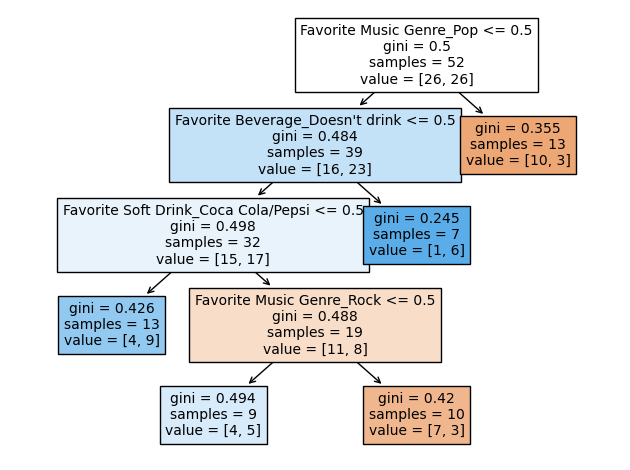

In [25]:
decision_tree = best_grid_model.named_steps["decisiontreeclassifier"]
print("Depth of tree is:" , decision_tree.get_depth())
tree.plot_tree(decision_tree, feature_names=feature_names ,filled=True, fontsize=10)
plt.tight_layout()
plt.show()

Although the model derived from GridSearchCV outperformed the standalone CCP approach, we hypothesized that applying CCP after grid search could further improve the model. By incorporating the optimal min_samples_leaf constraint (7) identified earlier, we aimed to enhance the tree's generalization ability while maintaining a robust structure.

In [26]:
X_train_transformed = preprocessor.transform(X_train)
path = decision_tree.cost_complexity_pruning_path(X_train_transformed, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [27]:
warnings.filterwarnings('ignore')
pruned_models = []
alpha_train_loop_values = []
alpha_test_loop_values = []
for ccp_alpha in ccp_alphas:
    pruned_model = make_pipeline(
        preprocessor,
        DecisionTreeClassifier(random_state=42,min_samples_leaf=7, ccp_alpha=ccp_alpha)
    )
    pruned_model.fit(X_train, y_train)
    pruned_models.append(pruned_model)
    train_score = pruned_model.score(X_train, y_train)
    test_score = pruned_model.score(X_test, y_test)
    alpha_train_loop_values.append([ccp_alpha, train_score])
    alpha_test_loop_values.append([ccp_alpha, test_score])

alpha_train_results = pd.DataFrame(alpha_train_loop_values, columns=["ccp alpha","score"]) 
alpha_test_results = pd.DataFrame(alpha_test_loop_values, columns=["ccp alpha","score"])    

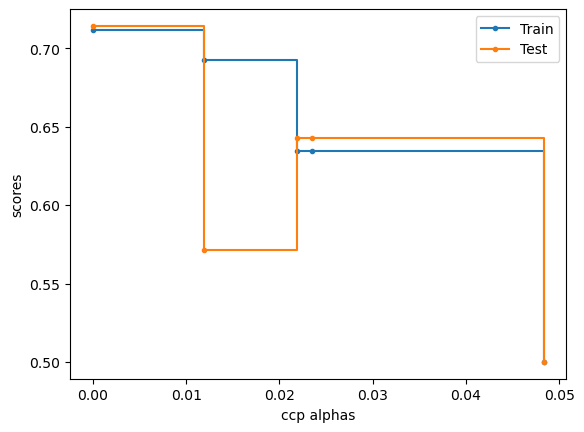

In [28]:
fig, ax = plt.subplots()
ax.errorbar(alpha_train_results["ccp alpha"], alpha_train_results["score"], label="Train",marker=".", drawstyle="steps-post")
ax.errorbar(alpha_test_results["ccp alpha"], alpha_test_results["score"], label="Test",marker="." , drawstyle="steps-post")
ax.set_xlabel("ccp alphas")
ax.set_ylabel("scores")
ax.legend()

### Choosing the Optimal `ccp_alpha` Value

When multiple `ccp_alpha` values result in the same training and testing scores,choose the highest `ccp_alpha` value among those that yield identical performance metrics, as this will likely result in a simpler and more robust model and avoids overfitting.



In [29]:
final_model = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42, min_samples_leaf=7, ccp_alpha=alpha_test_results["ccp alpha"][1])
)
final_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['Favorite Color',
                                                   'Favorite Music Genre',
                                                   'Favorite Beverage',
                                                   'Favorite Soft Drink'])],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.011898335582546105,
                                        min_samples_leaf=7, random_state=42))])

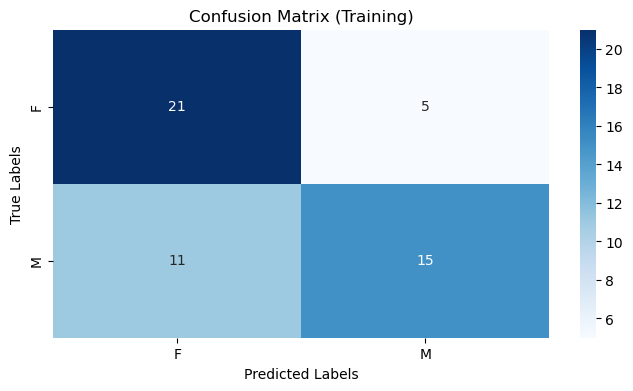

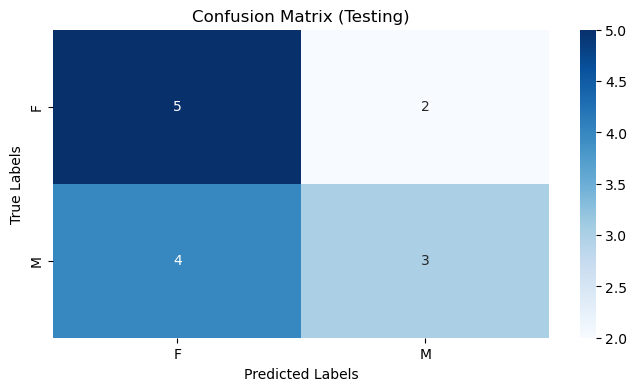

In [30]:
final_train_predicitions = final_model.predict(X_train)
final_test_predicitions = final_model.predict(X_test)
final_train_confusion_matrix = confusion_matrix(y_train, final_train_predicitions)
final_test_confusion_matrix = confusion_matrix(y_test, final_test_predicitions)
plt.figure(figsize=(8, 4))
sns.heatmap(
    final_train_confusion_matrix, annot=True, cmap='Blues',
    xticklabels = df["Gender"].unique(),
    yticklabels = df["Gender"].unique()
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Training)')
plt.show()

plt.figure(figsize=(8, 4))
sns.heatmap(
    final_test_confusion_matrix, annot=True, cmap='Blues',
    xticklabels = df["Gender"].unique(),
    yticklabels = df["Gender"].unique()
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Testing)')
plt.show()

### This still may not be a satisfying model. However, with more training data, we could enhance its performance and accuracy.

What if we add the constraint to the first best ccp alpha we found?
I could guess this doesn't make any change since if you look at the plot we showed for best pruned model before, none of its leaves have fewer than 7 samples..
Let's see:

In [31]:
model = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42, min_samples_leaf=7, ccp_alpha=best_alpha)
)
model.fit(X_train, y_train)
print("train score",model.score(X_train, y_train))
print("test score",model.score(X_test, y_test))

train score 0.6346153846153846
test score 0.6428571428571429


As you see, we got the same result.

### Conclusion

In this project, the grid search process has successfully identified an optimal set of hyperparameters for the decision tree, resulting in a model that performs well on both the training and testing datasets. The best model from `GridSearchCV` not only achieves higher accuracy but also avoids overfitting, outperforming the best model obtained from the CCP algorithm. This demonstrates the effectiveness of grid search in hyperparameter tuning for decision trees. Then we added the CCP algorithm to it. Even though it didn't make a lot of improvement to the score, we ended up with a tree with less complexity and same score.